In [1]:
import pandas as pd
# K-Means 라이브러리
from sklearn.cluster import KMeans
# 시각화 라이브러리
import matplotlib.pyplot as plt
# Only needed if you want to display your plots inline if using notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

In [2]:
custData = pd.read_csv("../lee/Python_ST_EX/dataset/kopo_customerdata.csv")
custData.head()

,CUSTOMERCODE,STATENAME,ST,GENDER,DOB,GENDER1,EMAIL,FEST_CNT,TOTAL_AMOUNT,AC_AMOUNT,AV_AMOUNT,HA_AMOUNT,EMI_CE_AMOUNT,IS_HIGHEND,CNT_VIST,GAP_VISIT
0,1503989,State2,2,Male,0,1,1,0,30300,0,30300,0,0,0,1,0
1,1190338,State2,2,Male,0,1,0,1,46500,0,46500,0,0,0,1,0
2,1424715,State2,2,Female,0,2,0,0,22700,0,0,22700,0,0,1,0
3,2483305,State2,2,Male,0,1,0,1,31400,0,31400,0,0,0,1,0
4,1178802,State2,2,Male,0,1,0,1,44900,0,0,44900,0,0,1,0


In [12]:
### 기본정보 가지고 있기
customerCode = custData[["CUSTOMERCODE"]]
### 특성정보 분리
features = custData[["ST","GENDER1","TOTAL_AMOUNT","AV_AMOUNT"]]

In [13]:
customerCode.head()

,CUSTOMERCODE
0,1503989
1,1190338
2,1424715
3,2483305
4,1178802


In [14]:
features.head()

,ST,GENDER1,TOTAL_AMOUNT,AV_AMOUNT
0,2,1,30300,30300
1,2,1,46500,46500
2,2,2,22700,0
3,2,1,31400,31400
4,2,1,44900,0


In [35]:
### 모델선언 및 feature 만 활용하여 자율학습 예측
model = KMeans(n_clusters=4, algorithm="auto")
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
predict = pd.DataFrame(model.predict(features))
predict.columns=["PREDICT"]

### customerCode, feature, predict 붙이기
result = pd.concat([customerCode, features, predict], axis = 1)

In [37]:
result[(result.PREDICT == 2)].head()

,CUSTOMERCODE,ST,GENDER1,TOTAL_AMOUNT,AV_AMOUNT,PREDICT
30,1198809,2,2,176600,176600,2
62,1763938,2,2,122900,122900,2
91,613443,2,1,146800,146800,2
231,1006397,2,1,142800,142800,2
461,1701227,2,1,180300,180300,2


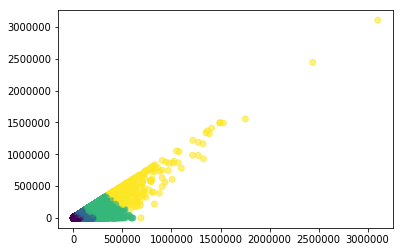

In [38]:
### 시각화 하기
plt.scatter(result["TOTAL_AMOUNT"],result["AV_AMOUNT"], c=result["PREDICT"], alpha=0.6)

## 위와는 다른 데이터

In [40]:
custData2 = pd.read_csv("../lee/Python_ST_EX/dataset/customerdata.csv")
custData2.head()

,CUSTID,AVGPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTO
0,A13566,4273.900000,3,6.4,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4.0,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5.0,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6.6,0.900000,Early-bird
4,B10634,3391.074215,2,4.2,2.453656,Sleeping-dog


In [43]:
### 기본정보 가지고 있기
custId = custData2[["CUSTID"]]
### 특성정보 분리
features2 = custData2[["AVGPRICE","EMI","DEVICECOUNT","PRODUCTAGE"]]

In [56]:
### 모델선언 및 feature 만 활용하여 자율학습 예측
model = KMeans(n_clusters=4, algorithm="auto")
model.fit(features2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
predict2 = pd.DataFrame(model.predict(features2))
predict2.columns=["PREDICT"]

### customerCode, feature, predict 붙이기
result2 = pd.concat([custId, features2, predict2], axis = 1)

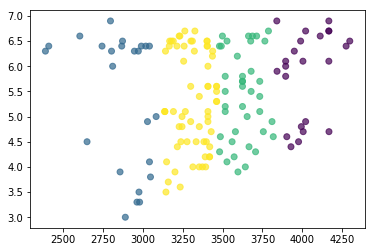

In [60]:
### 시각화 하기
plt.scatter(result2["AVGPRICE"],result2["DEVICECOUNT"], c=result2["PREDICT"], alpha=0.7)